# Анализ данных по 250 лучшим фильмам по версии Кинопоиска
## Данные взяты отсюда:
https://www.kaggle.com/datasets/alexandertesemnikov/kinopoisktop250russiandataset?resource=download

In [38]:
import pandas as pnd
from matplotlib import pyplot as plt
data = pnd.read_csv('kinopoisk-top250.csv') #загружаем датасет из csv-файла
print(list(data.columns)) #выводим список заголовков датасета

['rating', 'movie', 'year', 'country', 'rating_ball', 'overview', 'director', 'screenwriter', 'actors', 'url_logo']


- rating - место фильма в топе
- movie - название фильма
- year - год выпуска
- country - страна
- rating_ball - рейтинг фильма по десятибальной шкале
- overview - краткое описание фильма
- director - режиссер
- screenwriter - сценарист
- actors - список актеров
- url_logo - ссылка на логотип для фильма
<br>
<br>Такие данные, как ссылки на логотипы, а также описания и рейтинговые места можно убрать из датафрейма, чтобы они не мешались

In [12]:
data=data.drop(columns=['overview','url_logo', 'rating'], axis=1) #выбрасываем лишние столбцы
first10rows = data.head(10) #выводим первые 10 строк
print(first10rows)

                               movie  year  country  rating_ball  \
0                 Побег из Шоушенка   1994      США        9.111   
1                      Зеленая миля   1999      США        9.062   
2                      Форрест Гамп   1994      США        8.913   
3                   Список Шиндлера   1993      США        8.817   
4                               1+1   2011  Франция        8.807   
5                            Начало   2010      США        8.662   
6                              Леон   1994  Франция        8.681   
7                        Король Лев   1994      США        8.772   
8                   Бойцовский клуб   1999      США        8.645   
9  Иван Васильевич меняет профессию   1973     СССР        8.782   

                        director  \
0                 Фрэнк Дарабонт   
1                 Фрэнк Дарабонт   
2                 Роберт Земекис   
3                Стивен Спилберг   
4   Оливье Накаш;  Эрик Толедано   
5                Кристофер Нолан   

Теперь можно применить методы математической статистики и вывести некоторые интересные факты по этому датасету

In [13]:
data.describe()#получаем краткое описание статистических величин для числовых характеристик

,year,rating_ball
count,250.000000,250.000000
mean,1991.736000,8.231444
std,19.015168,0.230376
min,1921.000000,7.806000
25%,1980.000000,8.063500
50%,1997.500000,8.169000
75%,2005.000000,8.355750
max,2019.000000,9.111000


<br>mean - среднее значение; отсюда получаем: среднее значение года выпуска фильмов: 1991-1992, средний балл: 8.23
<br>std - стандартное отклонение, показывает то, насколько вариативен ряд (изменчивость). Год очень сильно колеблется, а средний балл - наоборот, слабо отклоняется от среднего значения
<br>самый старый фильм из топа: 1921 год, самый новый: 2019
<br>минимальный балл из топа: 7.8
<br>максимальный балл из топа: 9.11
<br>Остальное - квантили, они показывают год и балл, меньше которых 25, 50, 75% значений
<br>
<br>Выясним, сколько фильмов из каждой страны участвует в топе:

In [26]:
countries = dict()#создаем словарь
for i, row in data.iterrows():#обходим строки датафрейма
    country = row['country']#получаем название страны
    if country in countries.keys():#если такой ключ в словаре уже есть
        countries[country] = countries[country]+1#добавляем единицу
    else:
        countries[country]=1#присваиваем единицу, если это первый фильм из этой страны
print(countries)#выводим страны с количеством фильмов

{'США': 147, 'Франция': 8, 'СССР': 41, 'Италия': 7, 'Германия': 6, 'Новая Зеландия': 3, 'Великобритания': 15, 'Польша': 2, 'Япония': 7, 'Испания': 1, 'Россия': 4, 'Бразилия': 1, 'Индия': 3, 'Гонконг': 1, 'Канада': 1, 'Ирландия': 1, 'Дания': 1, 'Эстония': 1}


<br>Как можно заметить, больше всего фильмов в топе из США, а также из СССР, также есть фильмы из Франции, Италии, Германии, Новой Зеландии, Великобритании, Польши, Японии, Испании, Бразилии, Индии, Гонконга, Канады, Ирландии, Дании, Эстонии
<br>
<br>Выведем фильмы из СССР и России

In [33]:
nativefilms = data.loc[(data['country']=='Россия') | (data['country']=='СССР')]#фильмы из ссср или России
nativefilms=nativefilms.sort_values(by=['year']) #сортируем по году
print(nativefilms)#выводим отечественные фильмы

                                                 movie  year country  \
73                                      Летят журавли   1957    СССР   
82                                    Судьба человека   1959    СССР   
104                                 Баллада о солдате   1959    СССР   
107                                           Девчата   1962    СССР   
120  Добро пожаловать; или Посторонним вход воспрещен   1964    СССР   
171                                      Отец солдата   1964    СССР   
14           Операция «Ы» и другие приключения Шурика   1965    СССР   
170                                     Андрей Рублев   1966    СССР   
47   Кавказская пленница; или Новые приключения Шур...  1966    СССР   
197                               Берегись автомобиля   1966    СССР   
153                                   Золотой теленок   1968    СССР   
23                                 Бриллиантовая рука   1968    СССР   
76                                            Офицеры   1971    

Построим график: по оси абсцисс отложим год, по оси ординат - количество лучших фильмов из топа для этого года

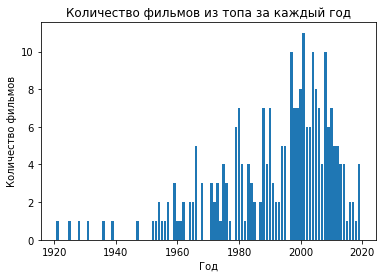

In [50]:
years = dict()#создаем словарь
for i, row in data.iterrows():#обходим строки датафрейма
    year = row['year']#получаем год
    if year in years.keys():#если такой ключ в словаре уже есть
        years[year] = years[year]+1#добавляем единицу
    else:
        years[year]=1#присваиваем единицу, если это первый фильм из этого года
plt.bar(years.keys(),years.values())
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.title('Количество фильмов из топа за каждый год')
plt.show()

Сделаем теперь круговую диаграмму для стран

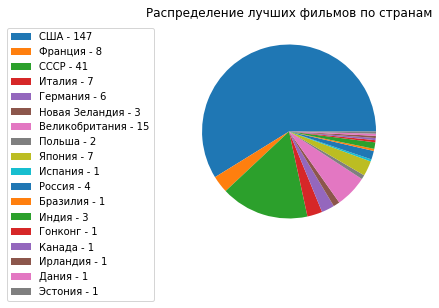

In [64]:
patches, texts=plt.pie(countries.values())
plt.title('Распределение лучших фильмов по странам')
labels = ['{0} - {1}'.format(i,j) for i,j in zip(countries.keys(), countries.values())]
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.))
plt.show()